<a href="https://colab.research.google.com/github/ronaldreighsrsc/ML-proyects/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DecisionTreeClassifier**

In [ ]:
# Arbol de clasificación
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = clf.predict(X_test)

In [ ]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Precisión del modelo: 1.00

Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


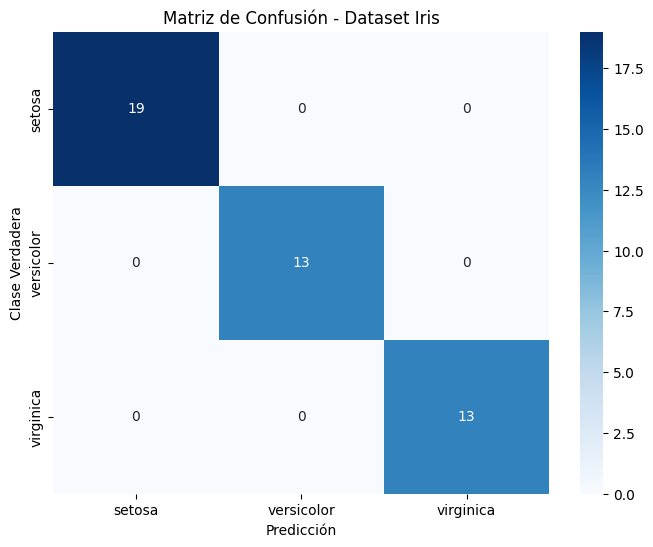

In [ ]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Clase Verdadera")
plt.title("Matriz de Confusión - Dataset Iris")
plt.show()


In [ ]:
# Generar el reporte de clasificación (precisión, recall, F1-score)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nReporte de Clasificación:")
print(report)



Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



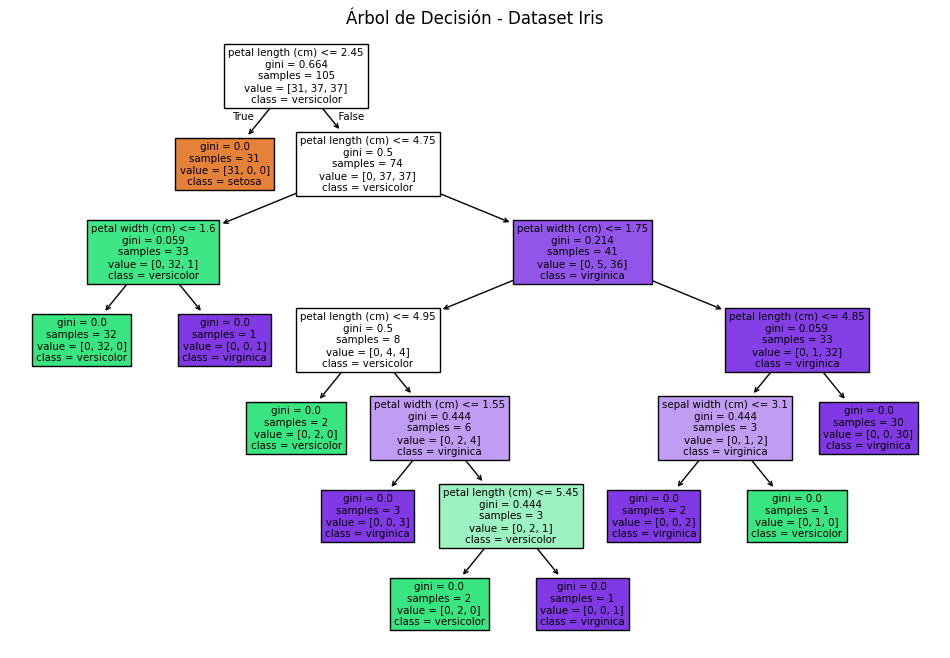

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()


**Random Forest**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 1.00


In [ ]:
# Mostrar importancia de variables
importances = rf.feature_importances_
for name, importance in zip(iris.feature_names, importances):
    print(f"{name}: {importance:.2f}")


sepal length (cm): 0.10
sepal width (cm): 0.04
petal length (cm): 0.42
petal width (cm): 0.43


**DecisionTreeRegression**

In [ ]:
# Arbol de regresión
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Cargar el dataset Boston Housing
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # Características
y = boston.target  # Variable objetivo (precio de la vivienda)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de regresión
regressor = DecisionTreeRegressor(random_state=42, max_depth=3,min_samples_split=10,min_samples_leaf=5)#3?
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [ ]:
# Evaluar el modelo
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE en entrenamiento: {train_mse:.2f}")
print(f"MSE en prueba: {test_mse:.2f}")
print(f"R² en prueba: {r2:.2f}")
#comparar mse de prueba y de entrenamiento

MSE en entrenamiento: 18.06
MSE en prueba: 21.97
R² en prueba: 0.71


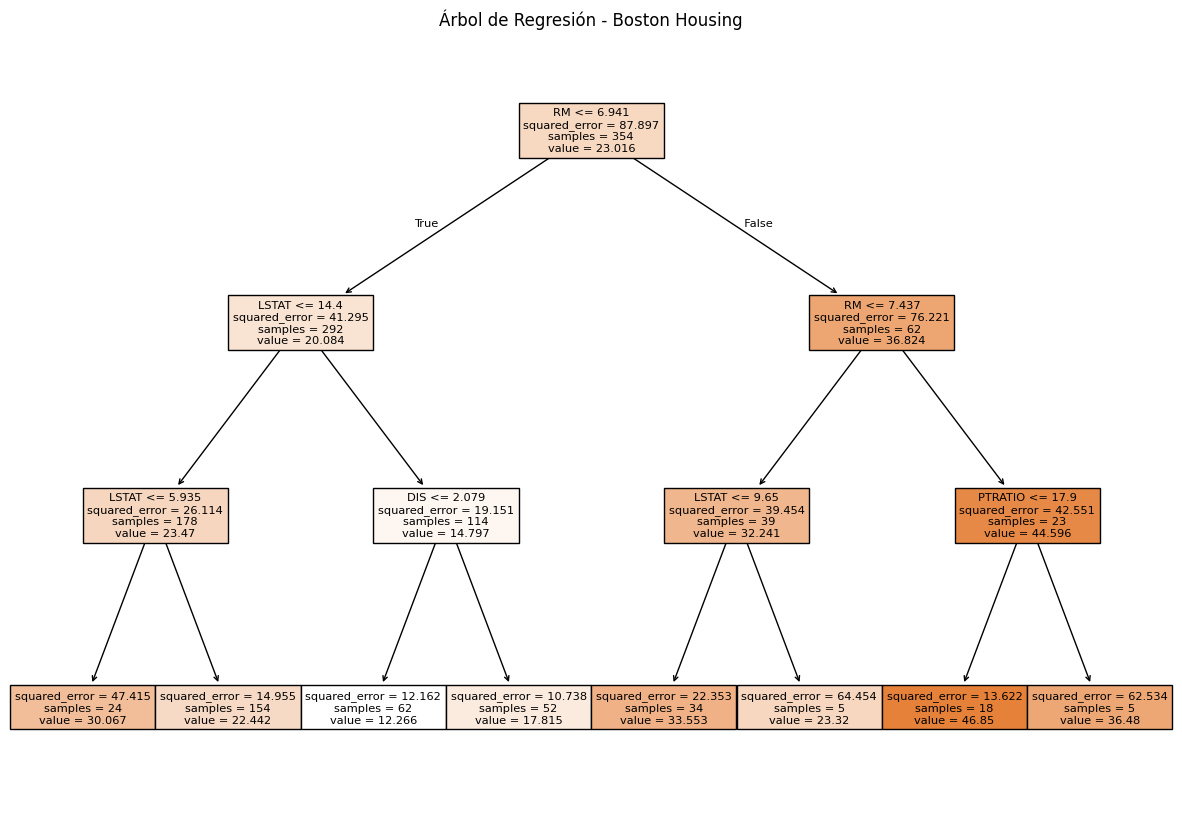

In [ ]:
# Visualizar el árbol de regresión
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title("Árbol de Regresión - Boston Housing")
plt.show()
